In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from rubin_scheduler.utils import SURVEY_START_MJD, calc_season, ddf_locations
from lsst.ts.fbs.utils.maintel.lsst_ddf_presched import optimize_ddf_times
from rubin_scheduler.data import get_data_dir
import os

In [2]:
data_file = os.path.join(get_data_dir(), "scheduler", "ddf_grid_fine.npz")
survey_start_mjd = SURVEY_START_MJD
survey_length = 10.0
mjd_max = survey_start_mjd + survey_length * 365.25

In [3]:
ddfs = ddf_locations()
ddf_data = np.load(data_file)
ddf_grid = ddf_data["ddf_grid"].copy()

In [4]:
in_range = np.where(
        (ddf_grid["mjd"] >= survey_start_mjd) & (ddf_grid["mjd"] <= mjd_max)
    )
ddf_grid = ddf_grid[in_range]

In [5]:
ddf_name = "COSMOS"

season_length = 225
offseason_length = (365.0 - season_length) / 2.0
n_sequences = 60
moon_illum_gt = None
moon_illum_lt = None

sequence_time = 300
only_season = 5
mask_even_odd = None

g_depth_limit = 23.5

mjds, night_mjd, cumulative_desired, cumulative_sched = optimize_ddf_times(
                ddf_name,
                ddfs[ddf_name][0],
                ddf_grid,
                sun_limit=-18,
                sequence_time=sequence_time / 60.0,
                airmass_limit=2.5,
                sky_limit=None,
                g_depth_limit=g_depth_limit,
                offseason_length=offseason_length,
                low_season_frac=0,
                low_season_rate=0.3,
                survey_start_mjd=survey_start_mjd,
                season_seq=n_sequences,
                only_season=only_season,
                mask_even_odd=mask_even_odd,
                moon_illum_lt=moon_illum_lt,
                moon_illum_gt=moon_illum_gt,
                early_late_season_only=False,)

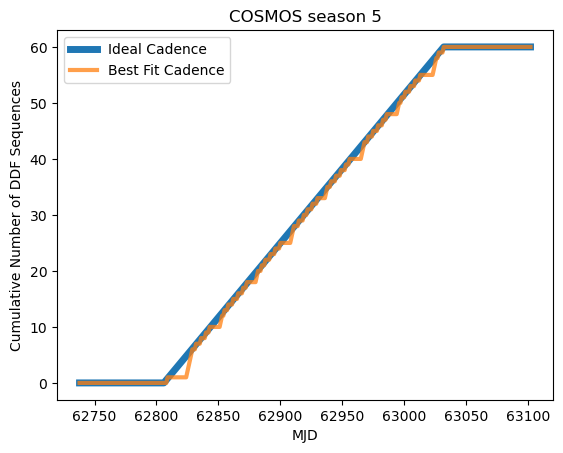

In [6]:
fig, ax = plt.subplots()

ax.plot(night_mjd, cumulative_desired, linewidth=5, label="Ideal Cadence")
ax.plot(night_mjd, cumulative_sched, alpha=0.75, linewidth=3, label="Best Fit Cadence")
ax.set_ylabel("Cumulative Number of DDF Sequences")
ax.set_xlabel("MJD")
ax.set_title(ddf_name + " season %i" % only_season)
ax.legend()
fig.savefig("ddf_cumulative.pdf")

In [7]:
night_mjd.shape, cumulative_desired.shape

((365,), (365,))

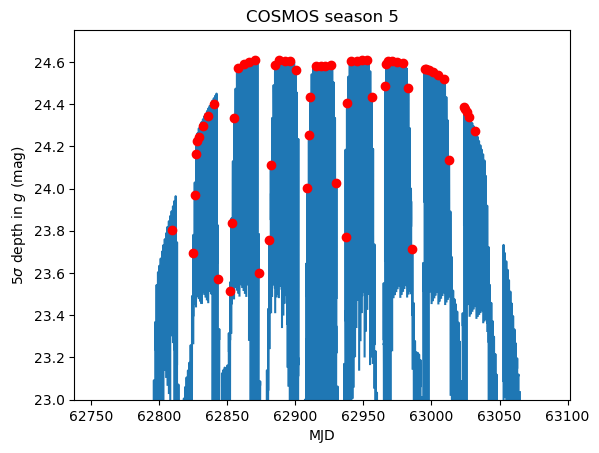

In [8]:
fig, ax = plt.subplots()

ax.plot(ddf_grid["mjd"], ddf_grid["%s_m5_g" % ddf_name])
ax.set_xlim([night_mjd.min(), night_mjd.max()])
ax.set_ylim([23,24.75])


ax.set_xlabel("MJD")
ax.set_ylabel(r"5$\sigma$ depth in $g$ (mag)")
ax.set_title(ddf_name + " season %i" % only_season)

y_interp = np.interp(mjds, ddf_grid["mjd"], ddf_grid["%s_m5_g" % ddf_name])

ax.plot(mjds, y_interp, 'ro')
fig.savefig("ddf_depth.pdf")